# Perceptron learning

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Perceptron learning is an iterative algorithm that converges to the appropriate weights for a single perceptron, given a learnable training set. If the training set is not learnable, the algorithm will not converge.

**Perceptron Learning Algorithm**

Given a dataset $X$ of $m$ observations $x \in \mathcal{R}^{1 \times n}$, an outcome vector $y \in \mathcal{R}^{m \times 1}$, we wish to find a weight vector $w \in \mathcal{R}^{n \times 1}$ such that $y_i = A(\mathbf{x}_i \cdot \mathbf{w})$ for each $0 \leq i < m$. In matrix form: $A(\mathbf{X} \mathbf{w}) = \mathbf{y}$. The last element of each observation vector $\mathbf{x}$ will be -1 to account for the bias term.

1. Initialize $ \mathbf{w} $ as a random vector.
2. **For each epoch**:
    - For each $ (\mathbf{x}_i, y_i)$ in the training set:
      - Compute $ \hat{y} = A(\mathbf{x}_i \cdot \mathbf{w}) $.
      - Update $ \mathbf{w} $ as:
        $$
        \mathbf{w} \leftarrow \mathbf{w} + (y_i - \hat{y}) \lambda \mathbf{x}_i
        $$
3. Compute accuracy:
   $$
   \text{accuracy} = 1 - \frac{\sum_i |f(\mathbf{x}_i) - A(\mathbf{x}_i \cdot \mathbf{w})|}{\text{len}(\text{training\_set})}
   $$
4. Return $ (\mathbf{w}, \text{accuracy}) $.

The learning rate $\lambda$ determines the rate of convergence. In practice $\lambda$ can be close to, but not greater than, 1.

We'll define the data set as a matrix $X$ and a vector $y$ using numpy. 

In [2]:
## The dataset corresponding to boolean AND. 

X = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])
y = np.array([[0, 0, 0, 1]])

In [3]:
## The heaviside step function

def A(x):
    return np.heaviside(x,0)

In numpy and tensorflow you will find extracting data elements with the appropriate dimensionality can be difficult. To get to i_th row of $X$, use the syntax

`x = X[i:i+1]`

this will ensure `x` is a matrix and not a vector (shape will be 2D not 1D)

You can now multiply `x` and `w` with `x @ w`

If you want `x` to be a 1D vector, you can use `x = X[i]`

In [4]:
def epoch(X,y,w,lr):
    for i in range(len(X)):
        x = X[i:i+1]
        wx = x @ w
        yhat = A(wx)
        upd = lr * (y[i] - yhat) * x
        w = w + upd.T
    return w

def perceptron_learn(X,y,lr):
    w = np.random.normal(0,1,(3, 1))
    accuracy = []
    for _ in range(100):
        w = epoch(X,y,w,lr)
        accuracy.append(1 - np.mean(np.abs(A(X @ w) - y)))
        if accuracy[-1] == 1:
            break
    return w, accuracy

In [5]:
weights, accuracies = perceptron_learn(X,y.T,0.1)
print(weights)
print(accuracies)

[[0.24302643]
 [0.44392336]
 [0.59011236]]
[np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(1.0)]


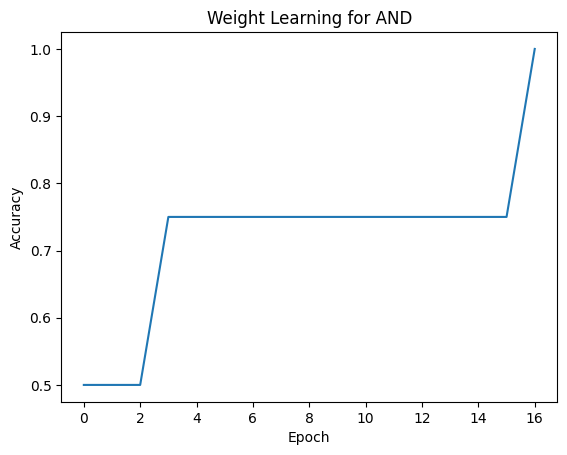

In [6]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Weight Learning for AND")
plt.plot(accuracies)
plt.show()

In [7]:
def ithboolean(i):
    X = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
    ])
    y = np.array([[i & 1, (i & 2) // 2, (i & 4) // 4, (i & 8) // 8]])
    return X, y

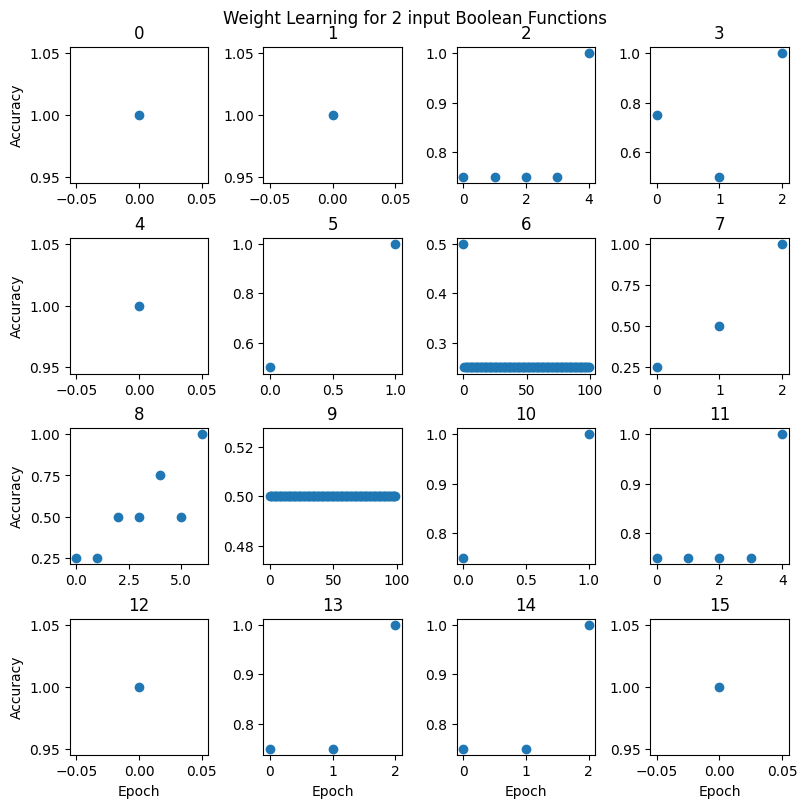

In [8]:
learnable = []

fig, axes = plt.subplots(4, 4, figsize=(8,8))
fig.suptitle("Weight Learning for 2 input Boolean Functions")
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for f in range(16):
    ax = axes[f // 4, f % 4]
    X, y = ithboolean(f)
    weights, accuracies = perceptron_learn(X,y.T,1)
    if(f % 4 == 0):
        ax.set_ylabel("Accuracy")
    if(f // 4 == 3):
        ax.set_xlabel("Epoch")
    if(accuracies[-1] == 1):
        learnable.append(f)
    ax.set_title(f"{f}")
    ax.plot(range(len(accuracies)), accuracies, 'o')
plt.show()

In [9]:
print("The learnable functions are: ", learnable)
print("The non-learnable functions are: ", [f for f in range(16) if f not in learnable])

The learnable functions are:  [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15]
The non-learnable functions are:  [6, 9]


Here are modified functions for more than 2 inputs:

In [10]:
import numpy as np
from tqdm import tqdm

def ithfunction(i, size):
    indices = np.arange(1 << size)
    X = np.array([(indices[:, None] >> np.arange(size)) & 1 for _ in [None]]).squeeze()
    X = np.hstack([X, -np.ones((X.shape[0], 1))])
    y = np.array([(i >> indices) & 1])
    return X, y.T

def epoch(X, y, w, lr):
    wx = X @ w
    yhat = np.where(wx >= 0, 1, 0)
    w += lr * (X.T @ (y - yhat))
    return w

def perceptron_learn(X, y, lr, size, max_epochs=100, tol=1.0):
    w = np.random.normal(0, 1, (size + 1, 1))
    for epoch_num in range(max_epochs):
        w = epoch(X, y, w, lr)
        pred = np.where(X @ w >= 0, 1, 0)
        accuracy = np.mean(pred == y)
        if accuracy >= tol:
            return w, True
    return w, False

def test_input_amount(amt):
    max_val = 1 << (1 << amt)
    learnable = []
    
    indices = np.arange(1 << amt)
    X_base = np.array([(indices[:, None] >> np.arange(amt)) & 1 for _ in [None]]).squeeze()
    X_base = np.hstack([X_base, -np.ones((X_base.shape[0], 1))])
    
    for f in tqdm(range(max_val)):
        y = np.array([(f >> indices) & 1]).T
            
        _, is_learnable = perceptron_learn(X_base, y, 0.1, amt, max_epochs=100)
        if is_learnable:
            learnable.append(f)
    
    notlearnable = list(set(range(max_val)) - set(learnable))
    print()
    return learnable, notlearnable

In [11]:
learnable, notlearnable = test_input_amount(3)

100%|██████████| 256/256 [00:00<00:00, 530.15it/s]

In [12]:
print("The learnable functions are: ", learnable)
print("The non-learnable functions are: ", notlearnable)
print("Percentage Learnable: ", len(learnable) / (1 << (1 << 3)) * 100)
print("Percentage Not Learnable: ", len(notlearnable) / (1 << (1 << 3)) * 100)

The learnable functions are:  [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 31, 32, 34, 35, 42, 43, 47, 48, 49, 50, 51, 55, 59, 63, 64, 68, 69, 76, 77, 79, 80, 81, 84, 85, 87, 93, 95, 112, 113, 115, 117, 119, 127, 128, 136, 138, 140, 142, 143, 160, 162, 168, 170, 171, 174, 175, 176, 178, 179, 186, 187, 191, 192, 196, 200, 204, 205, 206, 207, 208, 212, 213, 220, 221, 223, 224, 232, 234, 236, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 250, 251, 252, 253, 254, 255]
The non-learnable functions are:  [6, 9, 18, 20, 22, 24, 25, 26, 27, 28, 29, 30, 33, 36, 37, 38, 39, 40, 41, 44, 45, 46, 52, 53, 54, 56, 57, 58, 60, 61, 62, 65, 66, 67, 70, 71, 72, 73, 74, 75, 78, 82, 83, 86, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 114, 116, 118, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 135, 137, 139, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 163, 164,

In [13]:
sizes = [2, 3, 4]
lp = []
nlp = []
for size in sizes:
    learnable, notlearnable = test_input_amount(size)
    lp.append(len(learnable) / (1 << (1 << size)) * 100)
    nlp.append(len(notlearnable) / (1 << (1 << size)) * 100)

100%|██████████| 16/16 [00:00<00:00, 1266.20it/s]


100%|██████████| 256/256 [00:00<00:00, 432.70it/s]


100%|██████████| 65536/65536 [03:06<00:00, 352.07it/s]

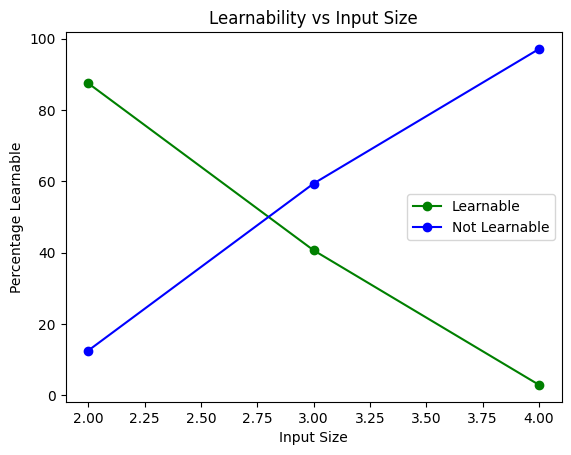

In [14]:
plt.title("Learnability vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Percentage Learnable")
plt.plot(sizes, lp, 'og-', label="Learnable")
plt.plot(sizes, nlp, 'ob-', label="Not Learnable")
plt.legend()
plt.show()

The 3 and 4 input functions are much less likely to be learnable by a single perceptron. This makes sense since it's easier to put points on opposite sides with the same value when there are more dimensions.